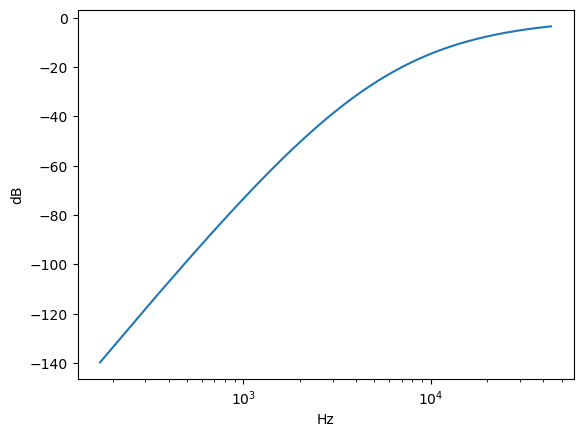

In [1]:
import numpy as np
from cmath import sqrt, exp, pi
import matplotlib.pyplot as plt

# s = Laplace Transform op
# wc, cutoff (angular frequency)
# n = number of poles

def H(s, wc, n, hp=False):
    Hs = 1
    
    if hp:
        s = 1 / s
        wc = 1 / wc
    
    for k in range(1, n+1):
        x =  1j * pi * (2 * k + n - 1) / (2 * n)
        
        Hs *= wc / (s - wc * exp(x))
        
    return Hs

def db_gain(w, wc, n):
    return 20 * np.log(abs(H(w, wc, n, hp=True)))

max_frequency = 44100.0
N=256
eps = 1 / (N + 1)

omega_axis = np.linspace(eps, 1, num=N, endpoint=False)

plt.xscale("log")
plt.xlabel("Hz")
plt.ylabel("dB")

plt.plot(max_frequency * omega_axis, db_gain(omega_axis, 0.125, 2))
